In [1]:
%load_ext autoreload
%autoreload 2

from model import LitS4Model
from data import LitDataModule
from plotting import make_bias, make_resolution
import torch
from torch.utils.data import DataLoader
device = 'cuda' if torch.cuda.is_available() else 'cpu'
import tqdm
import numpy as np

/n/holylabs/LABS/iaifi_lab/Users/creissel/miniforge3/envs/ssm/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
CHECKPOINT = '/n/home03/creissel/neutrino_project/runs/input_I__output_energy__d_model_6_n_layers_4/lightning_logs/h3zt5a4o/checkpoints/epoch=9-step=22380.ckpt'

In [3]:
model = LitS4Model.load_from_checkpoint(CHECKPOINT)
model = model.to(device)
model = model.eval()

In [4]:
#dataset = LitDataModule.load_from_checkpoint(CHECKPOINT, inputs=['output_ts_I'], variables=model.variables)
dataset = LitDataModule.load_from_checkpoint(CHECKPOINT)

In [5]:
true = []
pred = []

for ts,var in dataset.test_dataloader():
    with torch.no_grad():
        pred.append(model(ts.to(device)).cpu().numpy())
        true.append(var.numpy()) 
        
true = np.concatenate(true)
pred = np.concatenate(pred)

/n/holylabs/LABS/iaifi_lab/Users/creissel/miniforge3/envs/ssm/lib/python3.10/site-packages/torch/nn/functional.py:1381: UserWarning: dropout2d: Received a 3D input to dropout2d and assuming that channel-wise 1D dropout behavior is desired - input is interpreted as shape (N, C, L), where C is the channel dim. This behavior will change in a future release to interpret the input as one without a batch dimension, i.e. shape (C, H, W). To maintain the 1D channel-wise dropout behavior, please switch to using dropout1d instead.
  warnings.warn("dropout2d: Received a 3D input to dropout2d and assuming that channel-wise "


In [6]:
# undo the normalization
mu_y = dataset.mu[0]
stds_y = dataset.stds[0]

pred_post = (pred*stds_y+mu_y)
true_post = (true*stds_y+mu_y)

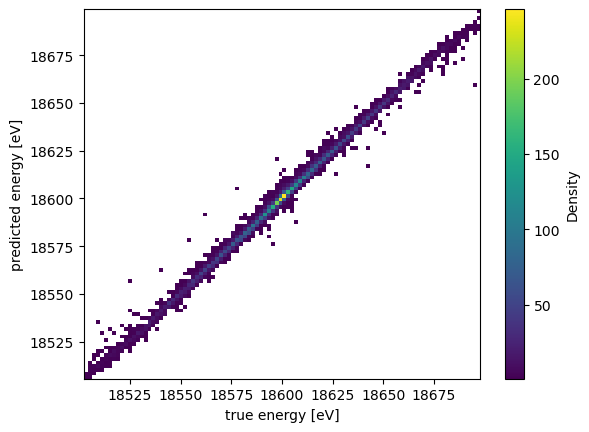

In [7]:
for idx, var in enumerate(model.variables):
    fig = make_bias(1, 'energy_eV', true_post, pred_post)

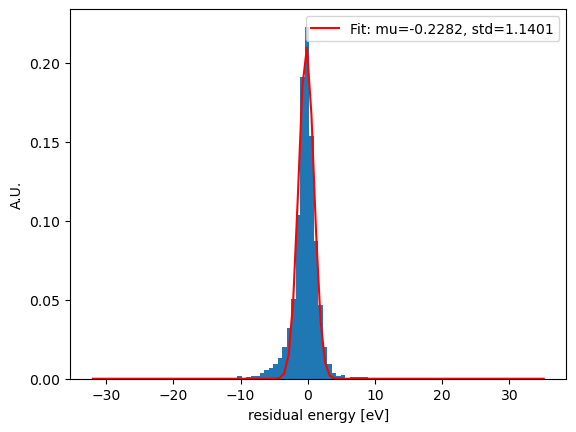

In [8]:
import matplotlib.pyplot as plt
for idx, var in enumerate(model.variables):
    fig = make_resolution(1, 'energy_eV', true_post, pred_post)